<a href="https://colab.research.google.com/github/abhinendra88/hotel-booking-analysis/blob/main/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [2]:
# Importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Loading dataset and storing it in dataframe

df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings.csv')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
# Printing first 5 rows of dataframe

df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
# Printing last 5 rows of dataframe

df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


In [8]:
# Printing shape of dataframe

df.shape

(119390, 32)

In [10]:
# List of columns present in dataset

list(df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [12]:
# Basic information of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
# Checking for total null values in each column

df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
hotel                                  0
previous_cancellations                 0
days_in_waiting_list                   0
customer_type                          0
adr                                    0
required_car_parking_spaces            0
total_of_special_requests              0
reservation_status                     0
previous_bookings_not_canceled         0
is_repeated_guest                      0
is_canceled                            0
distribution_channel                   0
market_segment                         0
meal                                   0
babies                                 0
adults                                 0
stays_in_week_ni

In [14]:
# Percentage of null values in each column

print(100*(df.isnull().sum()/len(df.index)).sort_values(ascending=False))

company                           94.306893
agent                             13.686238
country                            0.408744
children                           0.003350
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                       0.000000
hotel                              0.000000
previous_cancellations             0.000000
days_in_waiting_list               0.000000
customer_type                      0.000000
adr                                0.000000
required_car_parking_spaces        0.000000
total_of_special_requests          0.000000
reservation_status                 0.000000
previous_bookings_not_canceled     0.000000
is_repeated_guest                  0.000000
is_canceled                        0.000000
distribution_channel               0.000000
market_segment                     0.000000
meal                               0.000000
babies                          

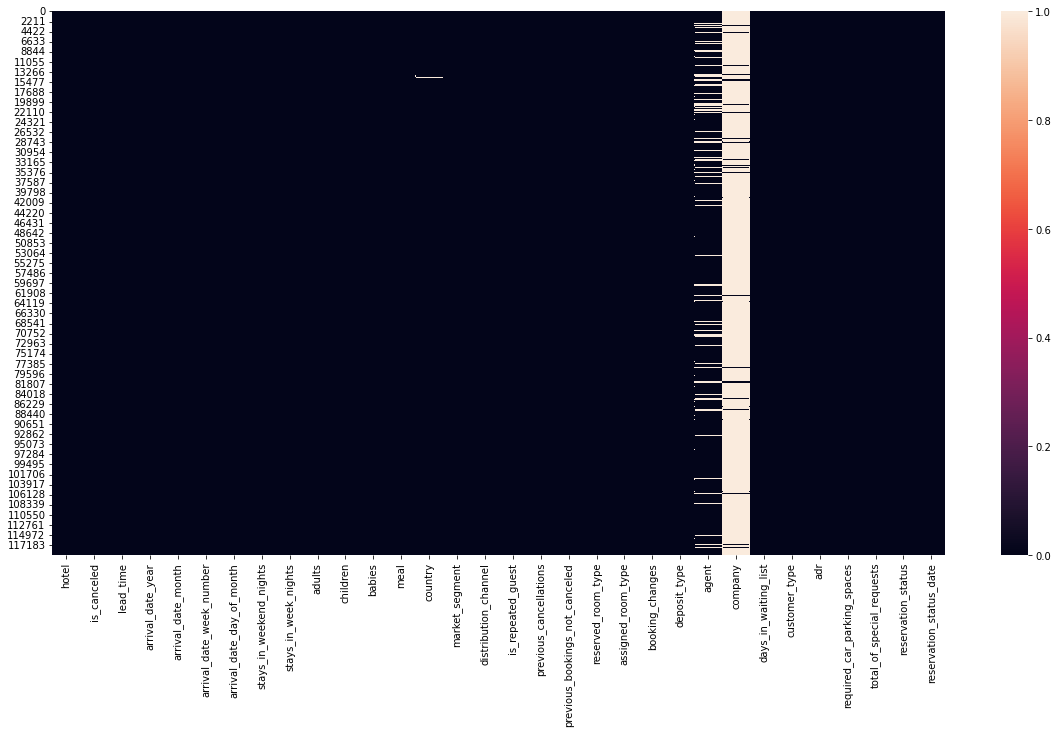

In [15]:
# Plotting heatmap of null values

fig,axes = plt.subplots(1,1,figsize=(20,10))
sns.heatmap(df.isna())
plt.show()


**Conclusion:**

**1. There are four columns which contains null values are Country, agent, company and children.**



**2. Approx 94% of Company column is filled with null values**







In [16]:
# Before handling null values, first create a copy of original dataset.

hotel_df = df.copy()  

## Columns like Agent and Company have maximum number of null values as compared to other columns and we will replace all null values with 0, because these are not missing values instead they will be considered as "Not Applicable".

In [17]:
# Let's handle null values.
# Replacing null values of column Agent and Company with 0

hotel_df[['agent', 'company']] = hotel_df[['agent', 'company']].fillna(0.0)

## We will replace all missing values of column 'children' with rounded mean value as it contains the count of children.

In [18]:
# Replace missing children values with rounded mean value

hotel_df['children'].fillna(round(df['children'].mean()), inplace = True)

## Now, we will replace NULL values of 'country' column with mode of that column.

In [19]:
# Replace missing values of country column with mode.

hotel_df['country'].fillna(df['country'].mode().to_string(), inplace=True)

## Let's explore some columns.

In [30]:
hotel_df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [31]:
hotel_df['is_canceled'].value_counts()

0    75011
1    44199
Name: is_canceled, dtype: int64

In [32]:
hotel_df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [33]:
hotel_df['customer_type'].value_counts()

Transient          89476
Transient-Party    25088
Contract            4072
Group                574
Name: customer_type, dtype: int64

In [34]:
hotel_df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [35]:
hotel_df['market_segment'].value_counts()

Online TA        56408
Offline TA/TO    24182
Groups           19791
Direct           12582
Corporate         5282
Complementary      728
Aviation           235
Undefined            2
Name: market_segment, dtype: int64

In [36]:
hotel_df['adults'].value_counts()

2     89680
1     23027
3      6202
0       223
4        62
26        5
27        2
20        2
5         2
40        1
50        1
55        1
6         1
10        1
Name: adults, dtype: int64

In [37]:
hotel_df['children'].value_counts()

0.0     110620
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [38]:
hotel_df['babies'].value_counts()

0     118293
1        900
2         15
10         1
9          1
Name: babies, dtype: int64

# There are many rows that have zero guests including adults, children and babies, we need to remove those rows because they do not make any sense.

In [29]:
# Drop those rows which have adult, babies and children equals to 0

hotel_df = hotel_df.drop(df[(hotel_df.adults + hotel_df.babies + hotel_df.children)==0].index)

In [39]:
# Let's now check the shape of dataframe

hotel_df.shape

(119210, 32)

In [40]:
# Descriptive statistics of dataset

hotel_df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000,119210.000000
mean,0.370766,104.109227,2016.156472,27.163376,15.798717,0.927053,2.499195,1.859206,0.104043,0.007961,0.031499,0.087191,0.137094,0.218799,74.889078,10.735400,2.321215,101.969092,0.062553,0.571504
std,0.483012,106.875450,0.707485,13.601107,8.781070,0.995117,1.897106,0.575186,0.398836,0.097509,0.174663,0.844918,1.498137,0.638504,107.168884,53.830143,17.598002,50.434007,0.245360,0.792876
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.500000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.950000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,18.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


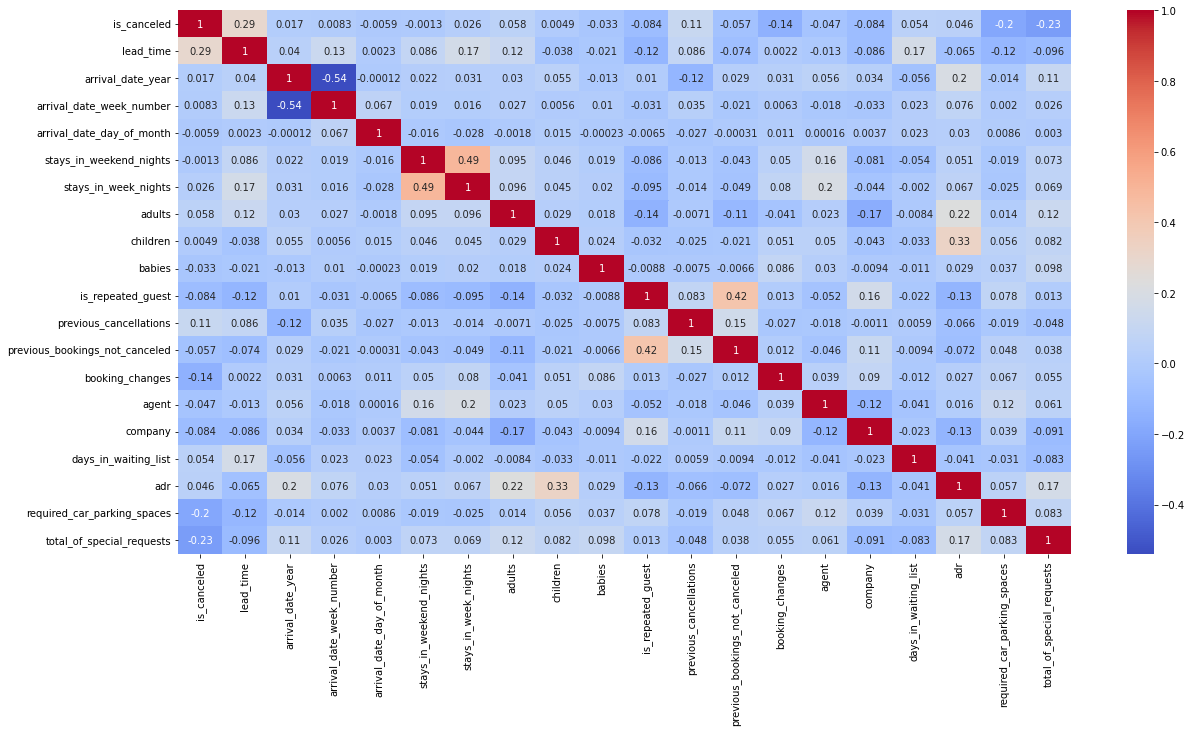

In [41]:
# Correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(hotel_df.corr(), cmap="coolwarm", annot=True)

## From the above correlation heatmap it is clear that 'is_canceled' is highly positively correlated with 'lead_time' as compared to other features.

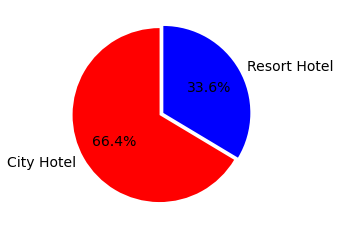

In [ ]:
# Pie plot to show types of hotels.

labels = hotel_df['hotel'].value_counts().index.tolist()
sizes = hotel_df['hotel'].value_counts().tolist()
explode = (0, 0.05)
colors = ['red', 'blue']

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',startangle =90, textprops={'fontsize': 14})
plt.show()

## 1. How many booking were cancelled in both type of hotels ?

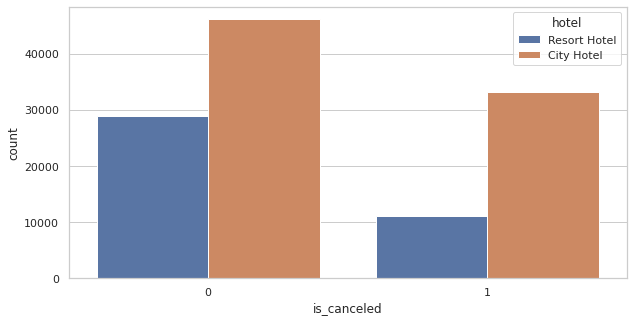

In [ ]:
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid")
ax = sns.countplot(x="is_canceled", hue ='hotel',data=hotel_df)

## In Resort hotel, booking cancellation is less as compared  to City hotel. And overall booking cancellation is low.

## 2. Which month is the most occupied and which is the least occupied?

In [42]:
# value_counts counts the number of times each values has appeared

hotel_df.arrival_date_month.value_counts(normalize=True)

August       0.116274
July         0.106065
May          0.098817
October      0.093507
April        0.092928
June         0.091679
September    0.088080
March        0.081939
February     0.067545
November     0.056799
December     0.056698
January      0.049669
Name: arrival_date_month, dtype: float64

In [43]:
month_df = hotel_df[hotel_df['is_canceled']==0]['arrival_date_month'].value_counts().reset_index().rename(columns = {'index':'month','arrival_date_month':'number_of_bookings'})
month_df

,month,number_of_bookings
0,August,8624
1,July,7907
2,May,7103
3,October,6901
4,March,6620
5,April,6560
6,June,6395
7,September,6385
8,February,5359
9,November,4651


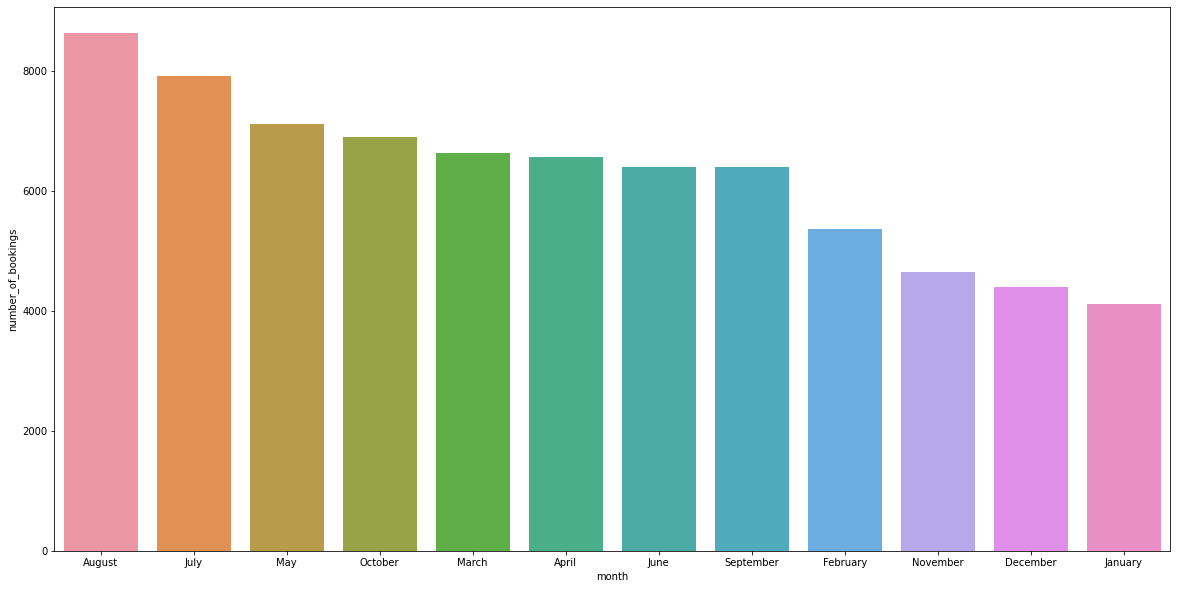

In [44]:
# Barplot of number of bookings in each month

plt.figure(figsize=(20,10))
ax = sns.barplot(x="month", y="number_of_bookings", data = month_df)

In [45]:
month_hotel_type = hotel_df[hotel_df['is_canceled']==0].groupby(['arrival_date_month','hotel'])['hotel'].count().unstack()
month_hotel_type

hotel,City Hotel,Resort Hotel
arrival_date_month,,
April,4010,2550
August,5367,3257
December,2377,2014
February,3051,2308
January,2249,1866
July,4770,3137
June,4358,2037
March,4049,2571
May,4568,2535


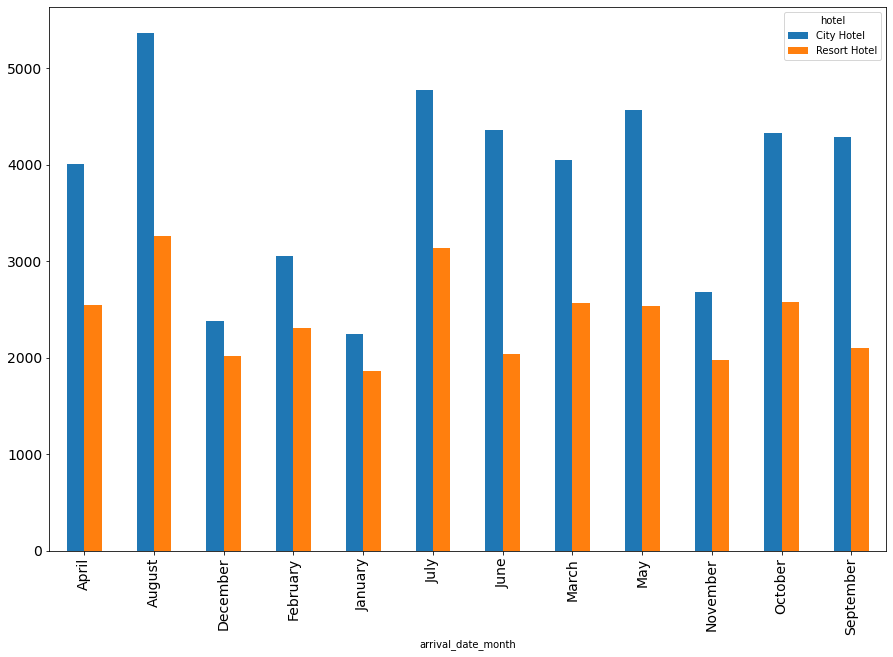

In [46]:
# Barplot of number of bookings in each month for both hotels.

ax = month_hotel_type.plot.bar(figsize = (15,10),fontsize = 14)

## August is the most occupied month with 11.65% bookings and January is the least occupied month with 4.94% bookings.

# 3. From which country most guests are coming?

In [48]:
# Value counts of top 10 countries from where maximum number of bookings happened

top_10_countries = hotel_df[hotel_df['is_canceled']==0]['country'].value_counts()[:10]

In [49]:
top_10_countries = top_10_countries.reset_index().rename(columns = {'index':'country','country':'number_of_bookings'})
top_10_countries['percentage'] = (top_10_countries['number_of_bookings']/top_10_countries['number_of_bookings'].sum())*100

In [50]:
top_10_countries

,country,number_of_bookings,percentage
0,PRT,20977,33.993421
1,GBR,9668,15.667083
2,FRA,8468,13.722472
3,ESP,6383,10.343710
4,DEU,6067,9.831629
5,IRL,2542,4.119334
6,ITA,2428,3.934596
7,BEL,1868,3.027111
8,NLD,1716,2.780794
9,USA,1592,2.579851


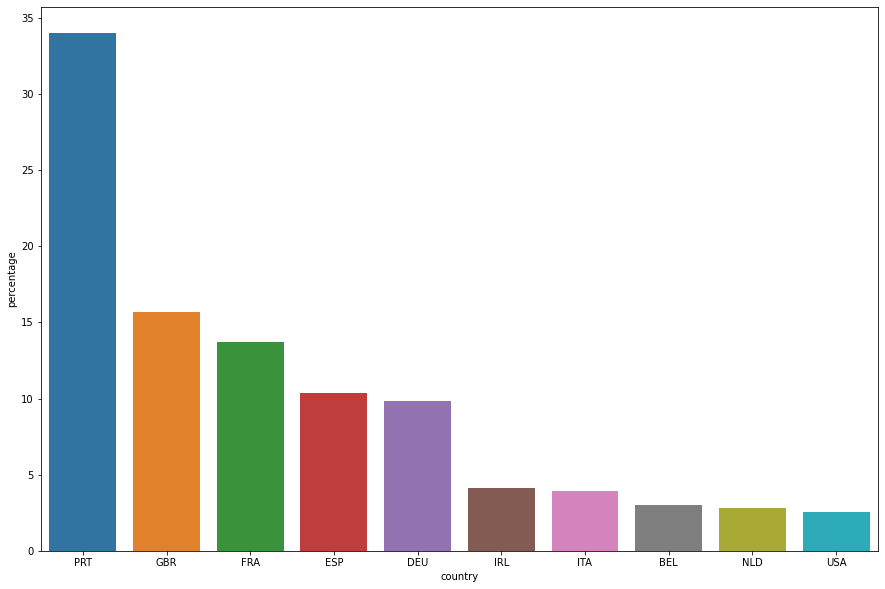

In [51]:
# Bar plot of top 10 countries

plt.figure(figsize=(15,10))
ax = sns.barplot(x="country", y="percentage", data=top_10_countries)

## More visitors are from western europe, namely Portugal,France, Great Britain and Spain being the highest.

#4. What are the number of weekend vs weekdays night bookings for resort hotels?

In [52]:
# First we will take only not cancelled booking values

not_canceled_data = hotel_df[hotel_df['is_canceled']==0]

In [53]:
# Total number of week night stay.

week_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_week_nights'].sum()

In [54]:
# Total number of weekend night stay.

weekend_nights = not_canceled_data[not_canceled_data['hotel'] == 'Resort Hotel']['stays_in_weekend_nights'].sum()

Text(0.5, 1.0, 'Number of bookings for week and weekend nights for Resort type hotel')

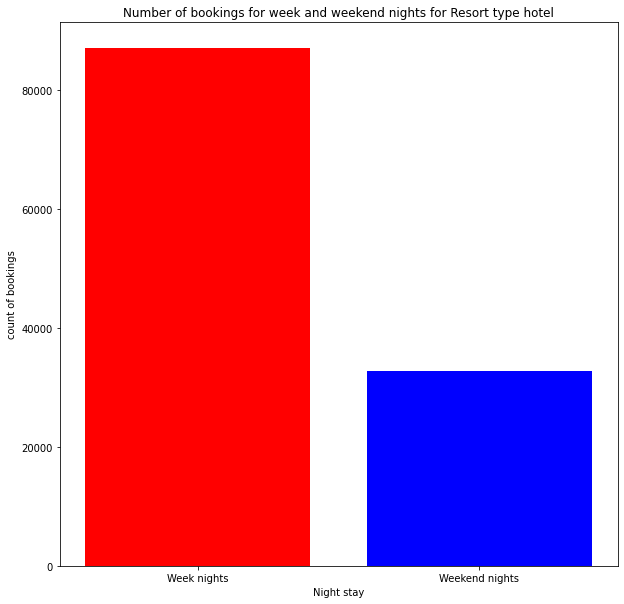

In [55]:
# Bar plot showing week nights and weekend nights stay for Resort hotels.

plt.figure(figsize=(10,10))
plt.bar(x=['Week nights','Weekend nights'],height = [week_nights,weekend_nights], color = ['red','blue'])
plt.xlabel('Night stay')
plt.ylabel('count of bookings')
plt.title('Number of bookings for week and weekend nights for Resort type hotel')

# 5. Let's check the distribution of adr.

In [56]:
# not_canceled dataframe that we have created earlier to get only those bookings which are not canceled.

not_canceled_data[not_canceled_data['adr'] == 0][not_canceled_data['market_segment']=='Complementary'].head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,...,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


### We have filtered our not_canceled_data dataframe on the basis of market segment as Complementary.

# The adr column consist of values which are euqal to 0. However, there are few rows where we see the market segment as Complementary for all those values and it makes sense. Other than those all other values seems as an anamoly and needs to be removed.

In [57]:
# Let's filter our copied dataset and remove anamolies.

hotel_df= hotel_df.drop(hotel_df[(hotel_df['adr'] == 0) & (hotel_df['market_segment'] != 'Complementary')].index)

In [58]:
hotel_df[hotel_df['adr']==0].head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
125,Resort Hotel,0,32,2015,July,27,4,0,1,4,...,No Deposit,0.0,0.0,0,Transient,0.0,0,1,Check-Out,2015-07-05
1705,Resort Hotel,0,3,2015,September,37,10,0,1,1,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-09-11
2240,Resort Hotel,0,13,2015,October,41,7,0,2,2,...,No Deposit,0.0,0.0,0,Transient,0.0,0,2,Check-Out,2015-10-09
2242,Resort Hotel,0,0,2015,October,41,7,0,1,3,...,No Deposit,0.0,0.0,0,Transient,0.0,0,0,Check-Out,2015-10-08
2448,Resort Hotel,0,1,2015,October,42,16,0,1,1,...,No Deposit,0.0,0.0,0,Transient,0.0,0,3,Check-Out,2015-10-17


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


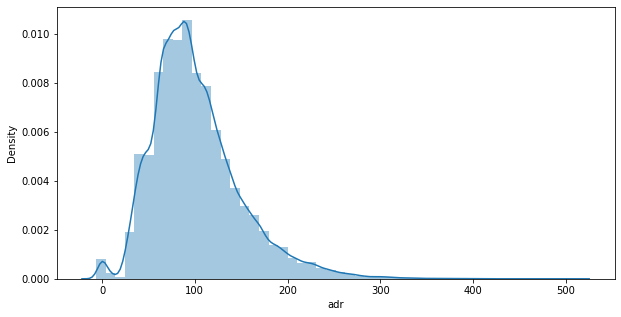

In [59]:
# Let's check distribution of adr column.

plt.figure(figsize=(10,5))
ax = sns.distplot(hotel_df[hotel_df['is_canceled']==0]['adr'])

In [60]:
# Central value of distribution.

hotel_df[hotel_df['is_canceled']==0]['adr'].median()

93.75

In [61]:
# Most occured value.

hotel_df[hotel_df['is_canceled']==0]['adr'].mode()

0    65.0
dtype: float64

In [62]:
# Average value.

hotel_df[hotel_df['is_canceled']==0]['adr'].mean()

101.57892064350412

## The above distribution plot is a right-skewed distribution, with an average adr of 100.57. Half of the adr values are less than 93.7 and the most repeated adr value is 65.

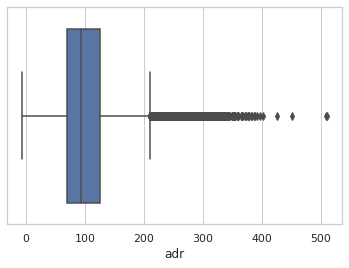

In [63]:
# Boxplot of adr column.

sns.set_theme(style="whitegrid")
ax = sns.boxplot(x=hotel_df[hotel_df['is_canceled']==0]['adr'])